# Unecessarily brutal 100 story egg simulator

A building has 100 floors. 

Given 2 identical eggs, how can you use them to find the threshold floor?

The egg will break from any particular floor above floor N, including floor N itself.

In [258]:
import random
import numpy as np

from typing import List
import matplotlib
import matplotlib.pyplot as plt

In [165]:
# Build the floors, put two eggs in two of them and choose the floor they start breaking on
def build(num_floors: int=100, egg1: int=0, egg2: int=50, breaks_on: bool=None):
    floors = [x for x in range(num_floors+1)]
    if not breaks_on: breaks_on = random.randrange(num_floors)

    return (floors, breaks_on, egg1, egg2)
    
floors, breaks_on, egg1, egg2 = build()

In [203]:
# Search for the floor they break on and return the number of steps it took.
# Use verbose=2 to print every step, verbose=1 for last result, and 0 for no verbose.
def search(floors: List[int], breaks_on: int, egg1: int, egg2: int, verbose: int=2, increment_by: int=1):
    if verbose > 0: print(f'breaks_on: {breaks_on}, egg1/egg2: {egg1}/{egg2}')

    step = 0
    egg1_broken = False
    egg2_broken = False
    found = False
    while (not egg1_broken or not egg2_broken) and not found:
        if verbose >= 2: print(f'Step {step}')
        if not egg1_broken and egg1 >= breaks_on:
            if verbose > 0: print(f'egg 1 broke on floor {egg1}!')
            if step > 0:
                if verbose > 0:
                    print(f'Found! Threshold floor is {breaks_on}')
                    print(f'Total steps: {step}')
                break
            egg1_broken = True
        else:
            if verbose >= 2: print(f'egg1 moves up')
            egg1 += 1

        if not egg2_broken and egg2 >= breaks_on:
            if verbose > 0: print(f'egg 2 broke on floor {egg2}!')
            if step > 0:
                if increment_by == 1:
                    if verbose > 0:
                        print(f'Found! Threshold floor is {breaks_on}')
                        print(f'Total steps: {step}')
                    break
                else:
                    egg1 = egg2 - increment_by
            egg2_broken = True

        else:
            if verbose >= 2: print(f'egg2 moves up')
            egg2 += increment_by
            
        step += 1
        if verbose >= 2: print()

    return step

In [217]:
search(*build(), increment_by=10, verbose=1)

breaks_on: 73, egg1/egg2: 0/50
egg 2 broke on floor 80!
egg 1 broke on floor 73!
Found! Threshold floor is 73
Total steps: 7


7

In [255]:
# Loop over the two selected egg locations n times and get the mean num of steps
def evaluate(egg1: int, egg2: int, increment_by: int=1, times: int=1000):
    total_steps = []
    for i in range(times):
        total_steps.append(search(*build(egg1=egg1, egg2=egg2), increment_by=increment_by, verbose=0))

    return total_steps

In [256]:
# Brute force egg2, egg1 stays constant 0.
def brute_force_egg2():
    increment_by = 10
    step_averages = []
    step_max = []
    egg1 = 0
    for i in range(increment_by, 100, increment_by):
        egg2 = i + 1
        step_averages.append([np.mean(evaluate(egg1, egg2, increment_by=increment_by)), egg1, egg2])
        step_max.append([np.max(evaluate(egg1, egg2, increment_by=increment_by)), egg1, egg2])
        if i % 10 == 0: print(i)
    return (np.array(step_averages), np.array(step_max))

step_averages, step_max =  brute_force_egg2()

10
20
30
40
50
60
70
80
90


In [317]:
def print_and_plot(step_averages, step_max):
    # Print top 10 lowest entries [num_steps, egg1, egg2]
    print('Worst case scenarios:')
    print(step_max[step_max[:, 0].argsort()][0:10])
    print()
    print('Average:')
    print(step_averages[step_averages[:, 0].argsort()][0:10])
    
    fig, ax = plt.subplots()
    ax.plot(step_max[:,-1], step_max[:,0],)

    ax.set(xlabel='egg2 on floor', ylabel='steps', title='Worst case scenario')
    ax.grid()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.plot(step_averages[:,-1], step_averages[:,0],)

    ax.set(xlabel='egg2 on floor', ylabel='steps', title='Average steps')

    ax.grid()
    plt.show()
    

Worst case scenarios:
[[19  0 11]
 [21  0 21]
 [31  0 31]
 [41  0 41]
 [51  0 51]
 [61  0 61]
 [71  0 71]
 [81  0 81]
 [91  0 91]]

Average:
[[10.397  0.    21.   ]
 [10.538  0.    11.   ]
 [12.057  0.    31.   ]
 [14.187  0.    41.   ]
 [17.993  0.    51.   ]
 [21.892  0.    61.   ]
 [28.639  0.    71.   ]
 [35.428  0.    81.   ]
 [42.338  0.    91.   ]]


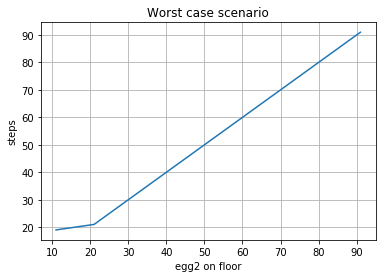

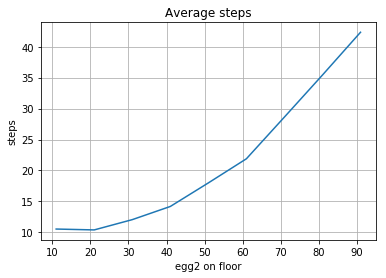

In [318]:
print_and_plot(step_averages, step_max)

In [143]:
#                        .-^-.
#                      .'=^=^='.
#                     /=^=^=^=^=\
#             .-~-.  :^=^=^=^=^=^;
#           .'~~*~~'.|^|^|^|^|^|^|
#          /~~*~~~*~~\^=^=^=^=^=^:
#         :~*~~~*~~~*~;\.-*))`*-,/
#         |~~~*~~~*~~|/*  ((*   *'.
#         :~*~~~*~~~*|   *))  *   *\
#          \~~*~~~*~~| *  ((*   *  /
#           `.~~*~~.' \  *))  *  .'
#             `~~~`    '-.((*_.-'
                       